Confusion Matrix:
[[1906247     104]
 [   1410    1025]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1906351
         1.0       0.91      0.42      0.58      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786


Accuracy Score:
0.9992068256996856


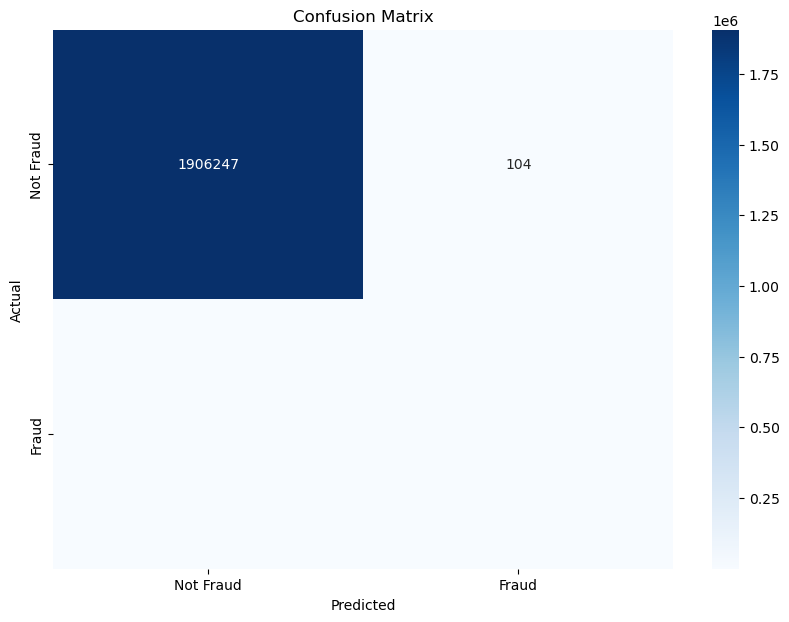

In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset
# Replace 'data.csv' with your dataset path
data = pd.read_csv('credit card.csv')

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5
                                })
data = data.replace('[^\d.]','', regex=True).astype(float)
data
data.dtypes

# Step 2: Data Preprocessing
# Assuming 'Class' is the target variable where 1 indicates fraud and 0 indicates non-fraud
# and the rest are the features.
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
